# Import Libraries


In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier




In [269]:
df = pd.read_csv('/Users/jestin/Documents/data scince/ML/projects/learnbay_projects_D_S/airlline_customer_satisfication_5/Data.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [271]:
# shape
df.shape

(129880, 24)

In [272]:
# check duplicates
df.duplicated().sum()

0

In [273]:
# check missig data
df.isnull().sum()
# there is missing values 

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [274]:
# checking the percentage of null values
df['Arrival Delay'].isnull().sum()/len(df['Arrival Delay'])*100

0.3025870033877425

# Analyzing the data

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [276]:
df.describe()

,ID,Age,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [277]:
# filling missing value using median because there is outlier in the feature...

df['Arrival Delay'].fillna(df['Arrival Delay'].median(),inplace= True)

In [278]:
# check missig data
df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [279]:
# removing unnecessary columns

df.drop(['ID'],axis = True,inplace = True)

In [280]:
df.head(2)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied


In [281]:
# identyfing the categorical columns of unique values 

for i in df.select_dtypes(include=['object']).columns:
    print("***", i, "******")
    print()
    print(set(df[i].tolist()))
    print()

*** Gender ******

{'Male', 'Female'}

*** Customer Type ******

{'First-time', 'Returning'}

*** Type of Travel ******

{'Personal', 'Business'}

*** Class ******

{'Economy Plus', 'Economy', 'Business'}

*** Flight Distance ******

{'397', '2212', '2408', '3840', '225', 56, '3868', 67, 73, 74, '3144', 76, 77, 78, 80, 83, 84, 86, 89, 90, '1646', '2990', 95, 96, 98, 100, 101, '2204', 102, 106, 107, '3534', 108, 109, 110, 111, '2123', 113, 114, '1932', 117, 116, 119, 120, 121, 118, 122, 115, 125, 126, 123, 128, 129, 130, '494', 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, '3098', 149, 150, 151, 152, 153, 154, 148, 156, '182', '129', 158, 160, 157, 162, 163, 164, 159, 166, 168, 169, 170, 171, 173, 174, 175, 177, 180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 214, 216, 220, 221, 222, '1764', 224, 223, 226, 227, 228, '1593', 230, 231, 232, '2087', 229, 235, '1435'

In [282]:
#  Object type datas are present in the Flight Distance dataset;

In [293]:
# converting the data set to (int) numerical format

df['Flight Distance'] = df['Flight Distance'].astype('int')

In [294]:
df['Flight Distance'] = df['Flight Distance'].apply(lambda x:'365' if x=='3655$' else x)

In [295]:
df['Flight Distance'] = df['Flight Distance'].apply(lambda x:'227' if x=='22%7' else x)

In [296]:
df['Flight Distance'] = df['Flight Distance'].apply(lambda x:'227' if x=='2$27' else x)

In [297]:
df['Flight Distance'].dtype

dtype('int64')

In [298]:
# rechecking categorical columns


for i in df.select_dtypes(include=['object']).columns:
    print(f"******* {i} ******")
    print()
    print(df[i].value_counts())
    print()

******* Gender ******

Gender
Female    65899
Male      63981
Name: count, dtype: int64

******* Customer Type ******

Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64

******* Type of Travel ******

Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64

******* Class ******

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

******* Satisfaction ******

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64



# outlier treatment

In [299]:
object_num = df.select_dtypes(include=['number']).columns
object_num


Index(['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

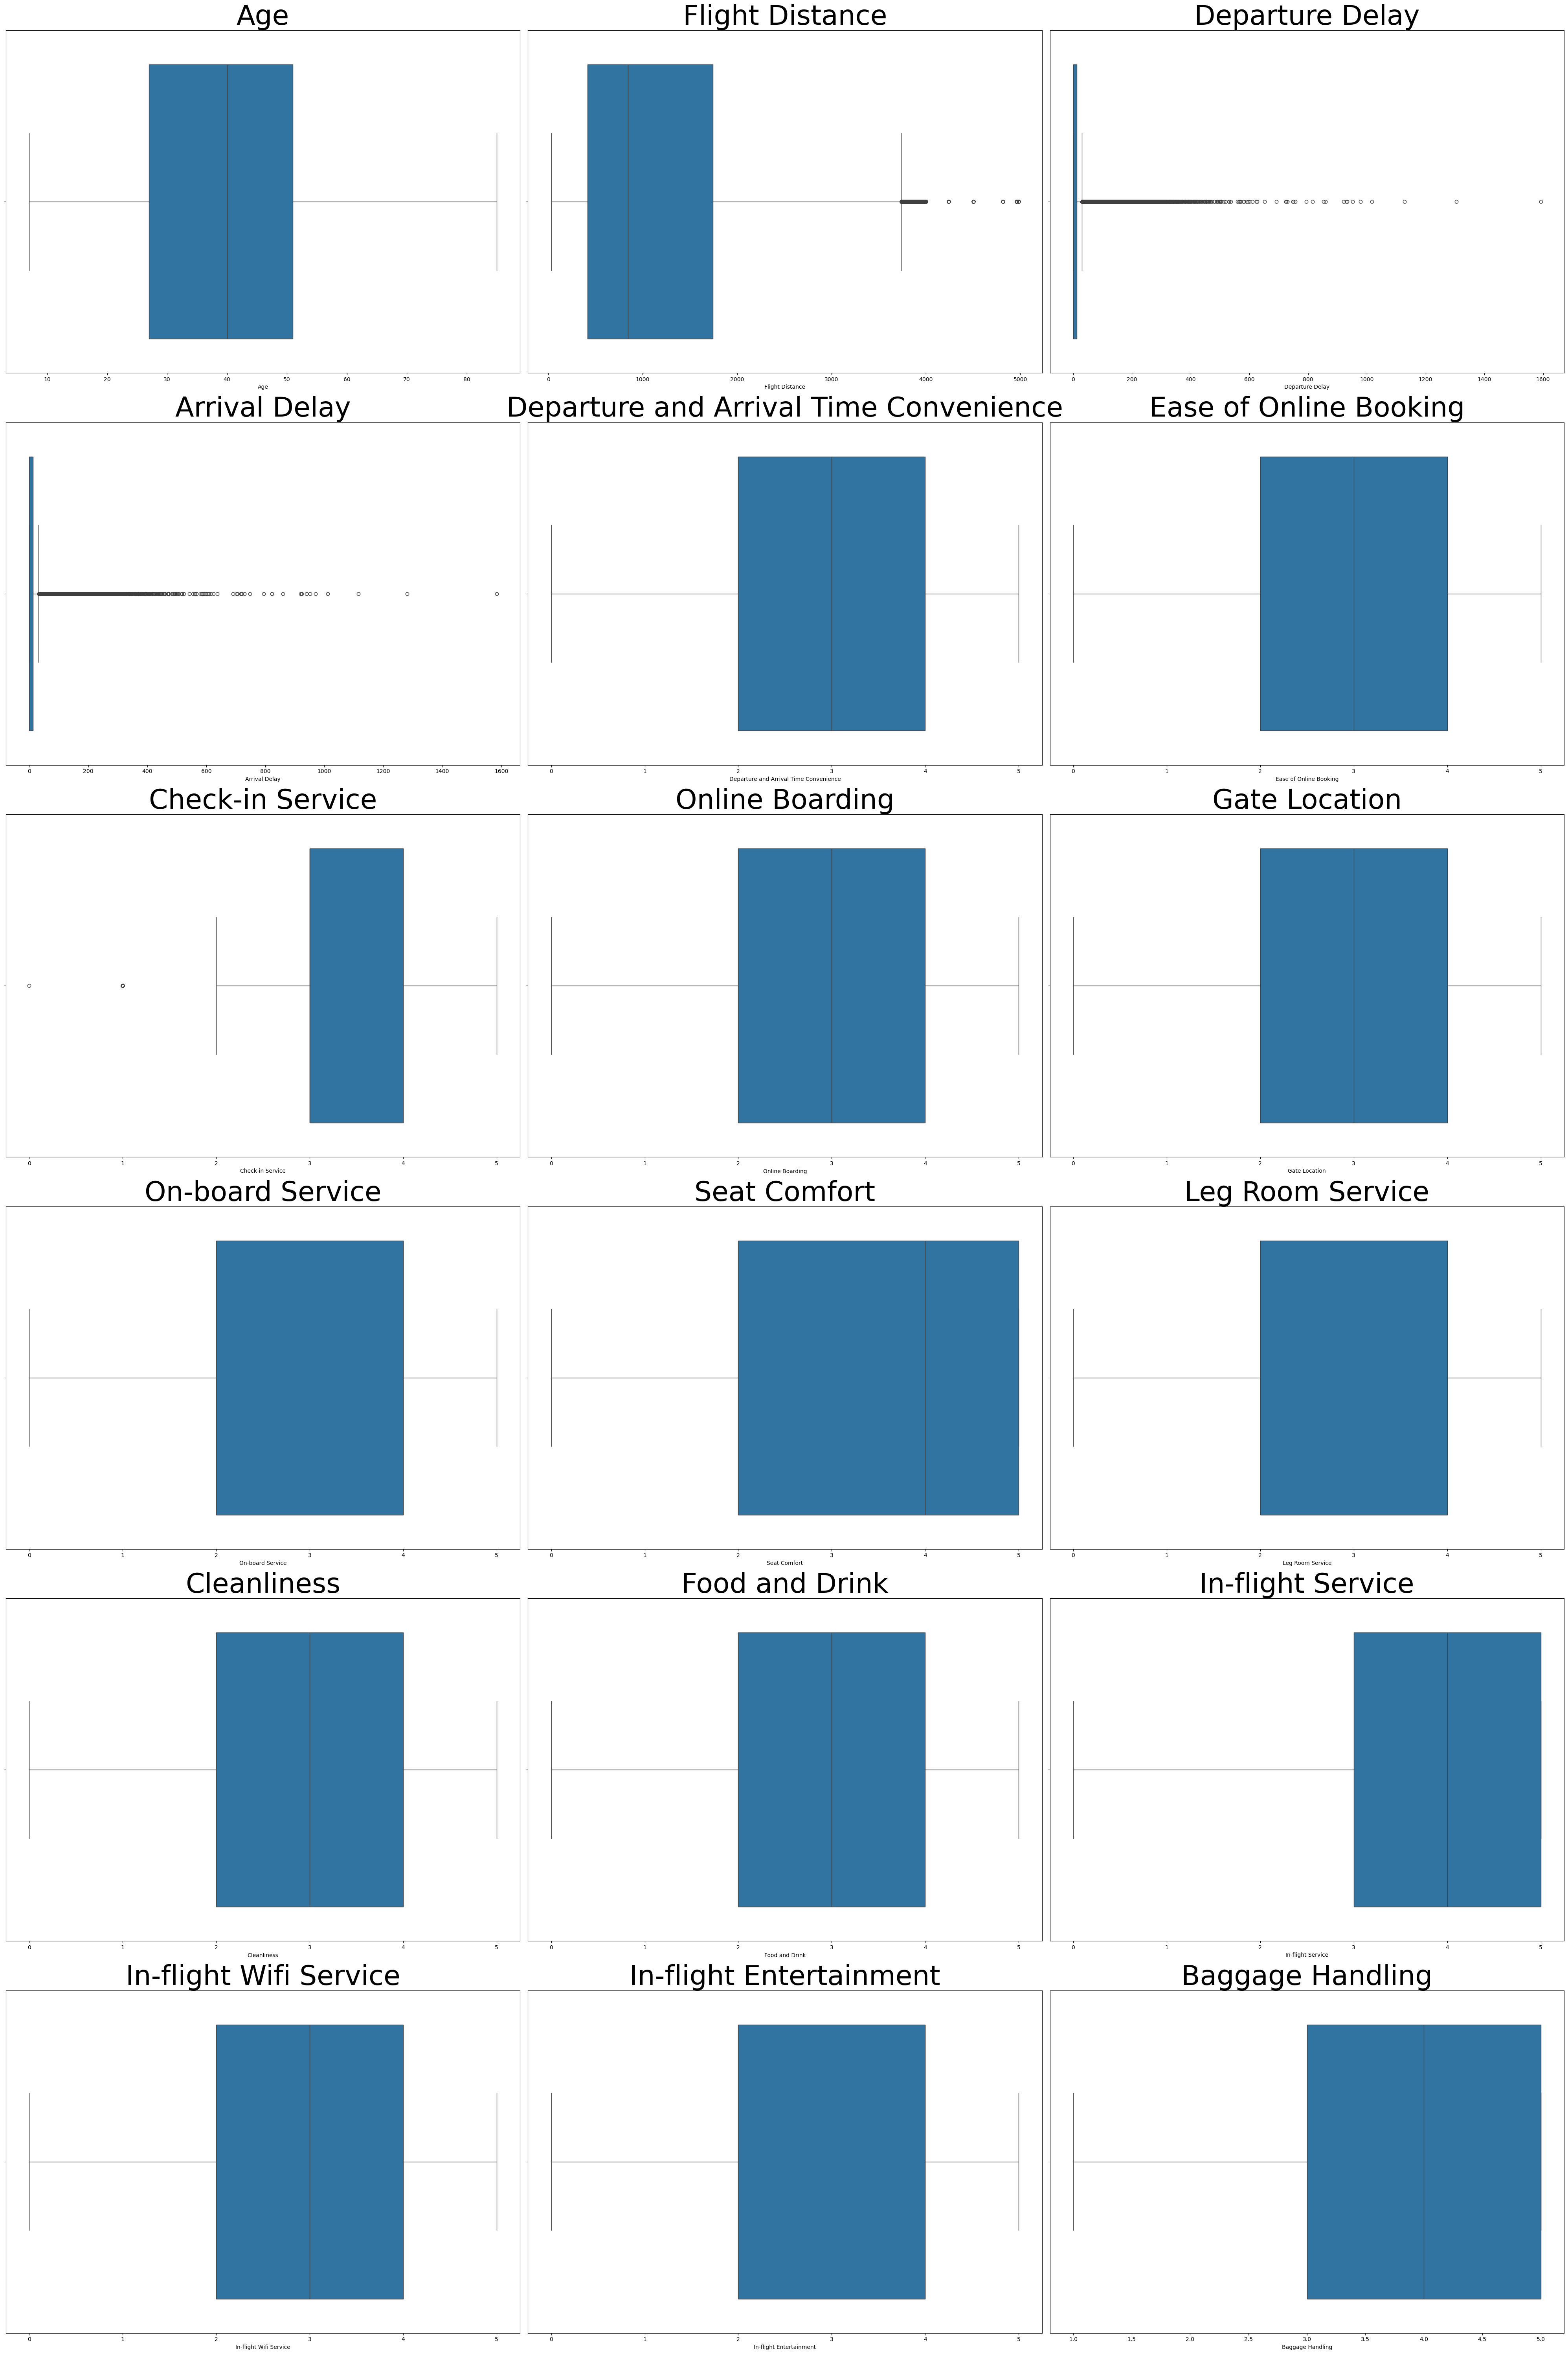

In [300]:
# Create subplots: 
fig, axes = plt.subplots(6, 3, figsize=(40, 60))


axes = axes.flatten()

# Loop over each column to plot
for i, col in enumerate(df.select_dtypes(exclude=['object']).columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col,fontsize= 50)

plt.tight_layout()
plt.show()

In [301]:
# here we can understand that there are a few outliers here in 
# ['flight distance','Departure Delay','Arrival Delay ','check-in service']

###  Handling outliers Using IQR Method

In [302]:
# handling outliers of ['Departure Delay']

Q1 = np.percentile(df['Departure Delay'], 25)
Q3 = np.percentile(df['Departure Delay'], 75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR


print(upper_limit)
print(lower_limit)

30.0
-18.0


In [303]:
df['Departure Delay']= np.where(df['Departure Delay']> upper_limit,upper_limit,
                               np.where(df['Departure Delay']<lower_limit,lower_limit, df['Departure Delay']))

In [304]:
Q1 = np.percentile(df["Flight Distance"],25)
Q3 = np.percentile(df['Flight Distance'],75)

IQR  = Q3-Q1

pos_outlier = Q3 +1.5* IQR
neg_outlier = Q1 -1.5* IQR

print(pos_outlier)
print(neg_outlier)

3739.0
-1581.0


In [305]:
df['Flight Distance']= np.where(df['Flight Distance']> pos_outlier,pos_outlier,
                               np.where(df['Flight Distance']<neg_outlier,neg_outlier, df['Flight Distance']))


In [306]:
Q1 = np.percentile(df['Arrival Delay'],25)
Q3 = np.percentile(df['Arrival Delay'],75)

IQR = Q3-Q1

pos_outlier = Q3 + 1.5* IQR
neg_outlier = Q1-1.5* IQR

print(pos_outlier)
print(neg_outlier)

df['Arrival Delay']= np.where(df['Arrival Delay']>pos_outlier,pos_outlier,
                             np.where(df['Arrival Delay']<neg_outlier,neg_outlier,df['Arrival Delay']))

32.5
-19.5


In [307]:
# only one outlier so it is fine
value_counts = df['Check-in Service'].value_counts()
print(value_counts)

Check-in Service
4    36333
3    35453
5    25883
1    16108
2    16102
0        1
Name: count, dtype: int64


In [308]:
median= df['Check-in Service'].median()
median

3.0

In [309]:
# removing the outlier  for  [check in service] by median

df['Check-in Service'] = np.where(df['Check-in Service']==0,median,df['Check-in Service'])

In [310]:
value_counts = df['Check-in Service'].value_counts()
print(value_counts)

Check-in Service
4.0    36333
3.0    35454
5.0    25883
1.0    16108
2.0    16102
Name: count, dtype: int64


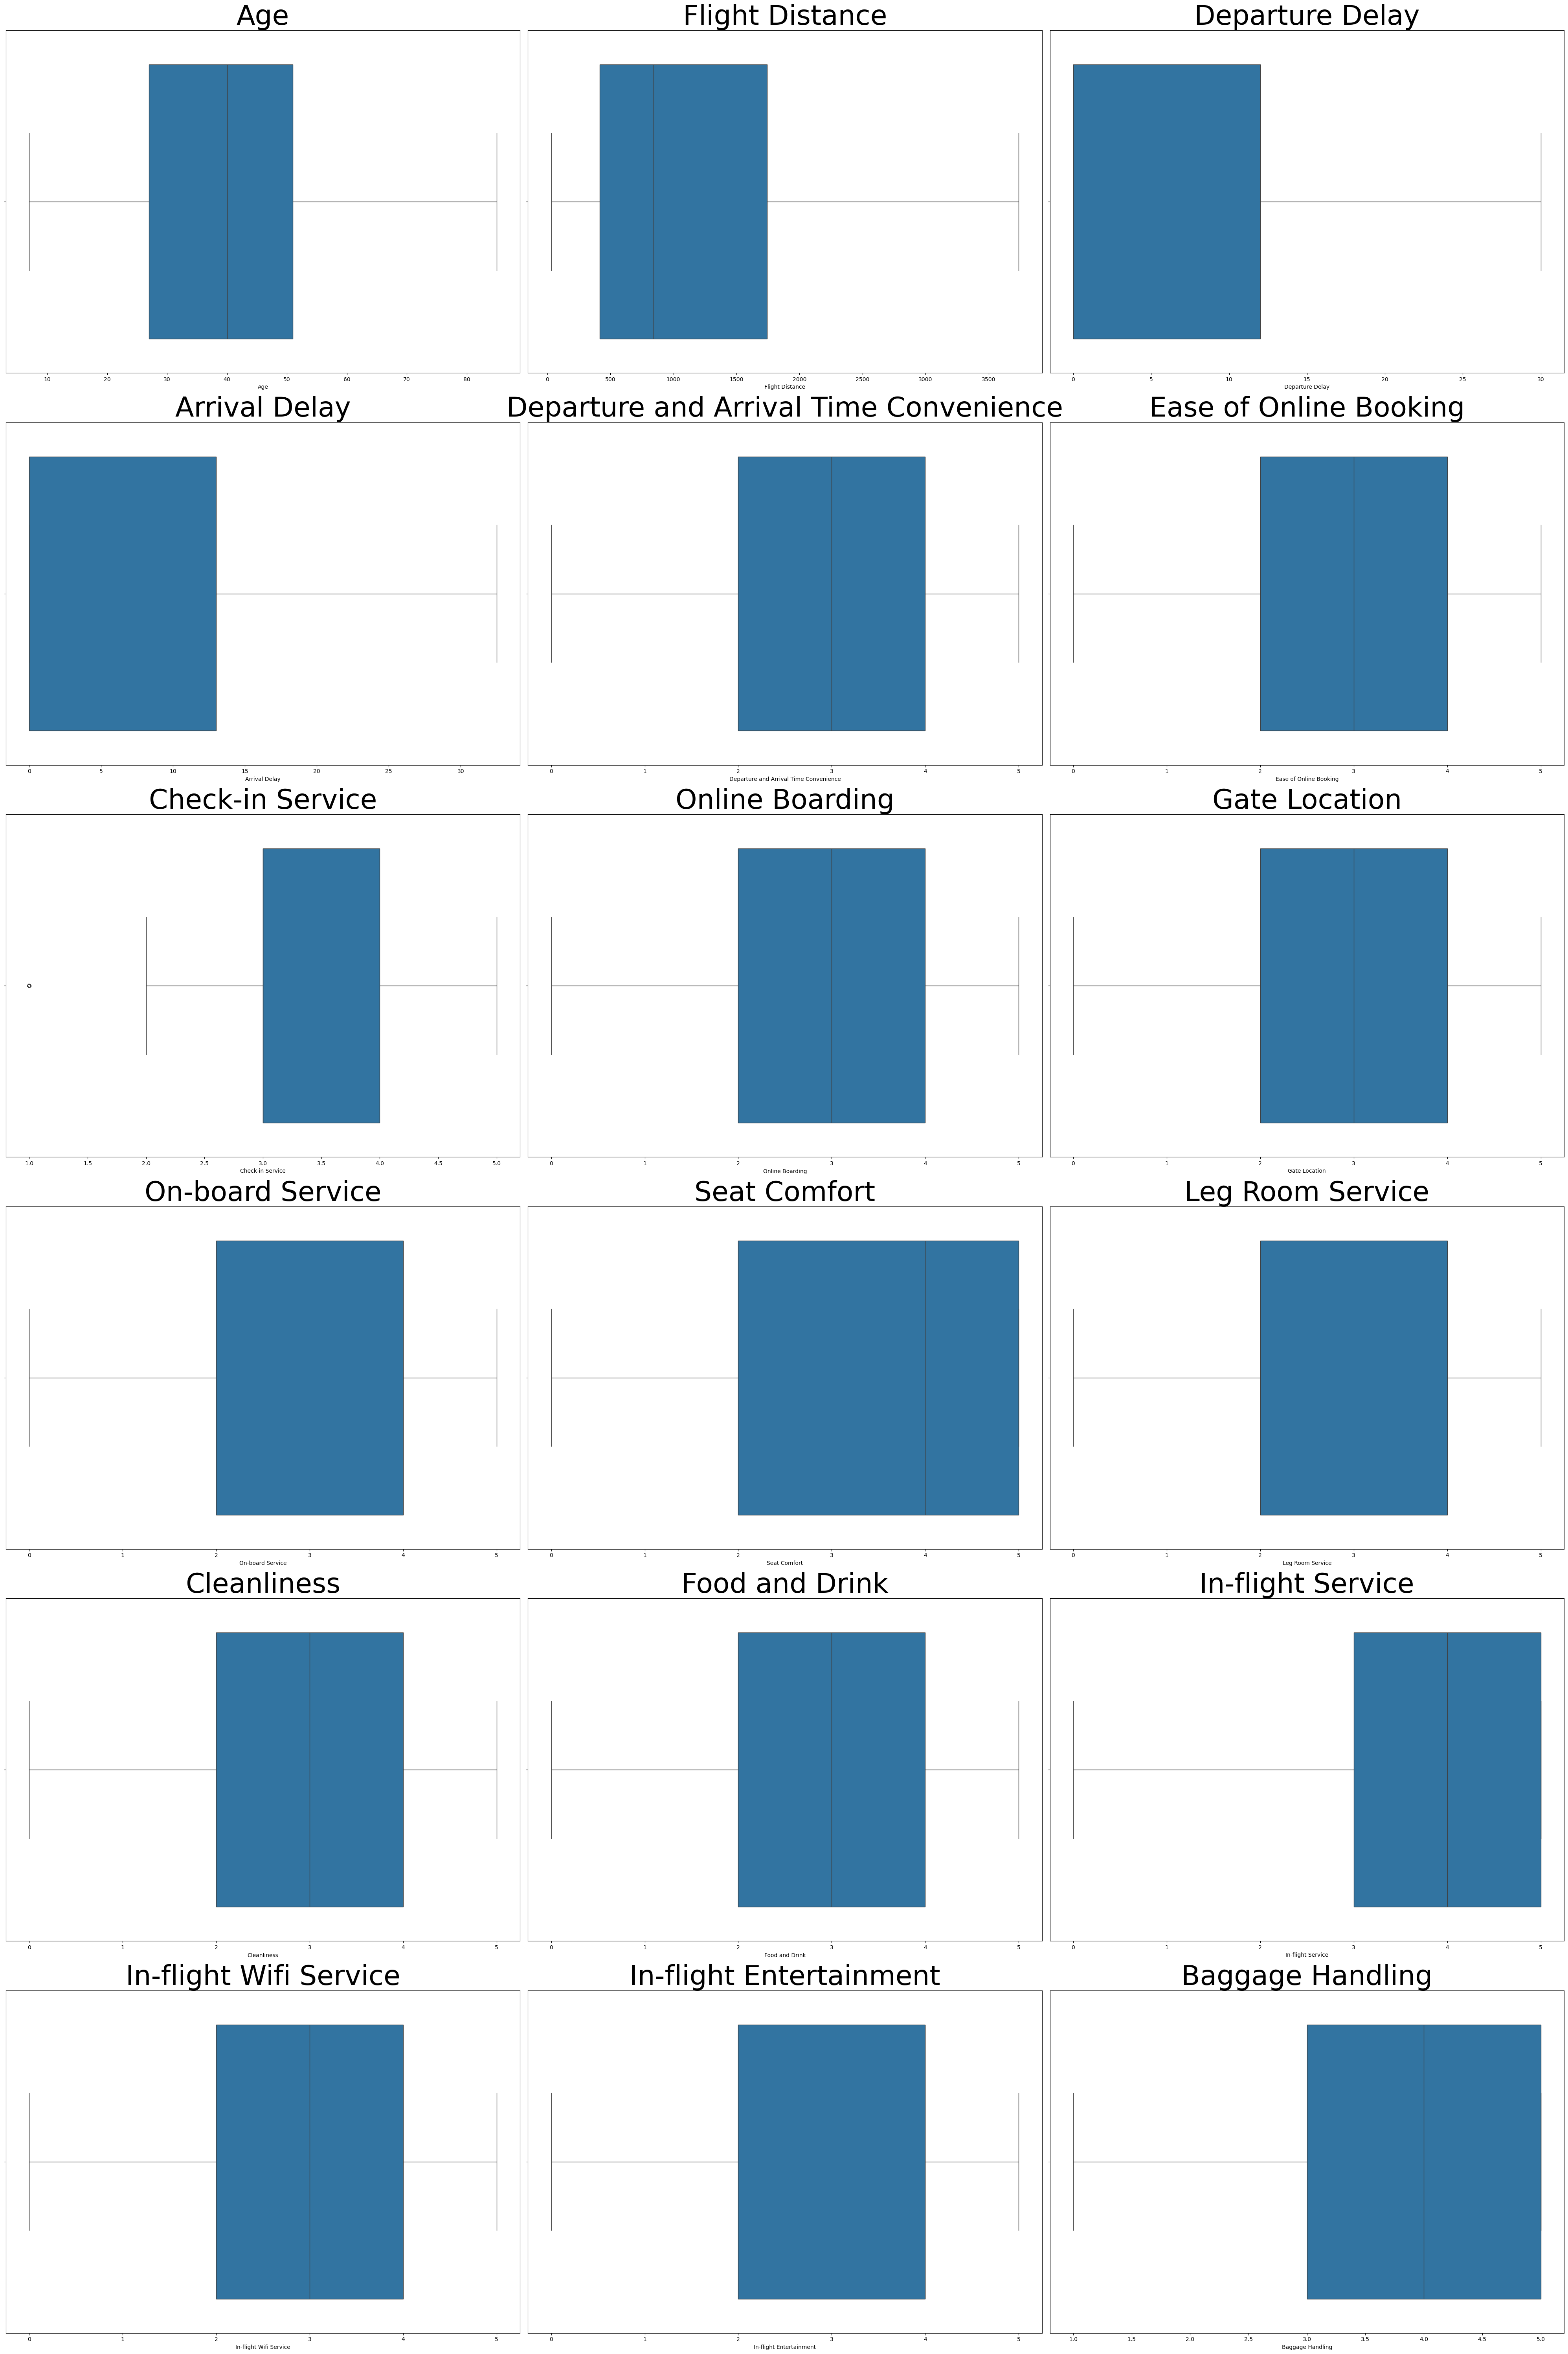

In [311]:
# Creating subplots to recheck: 
fig, axes = plt.subplots(6, 3, figsize=(40, 60))


axes = axes.flatten()

# Loop over each column to plot
for i, col in enumerate(df.select_dtypes(exclude=['object']).columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col,fontsize= 50)

plt.tight_layout()
plt.show()

In [312]:
df.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1186.970350,7.380798,7.909386,3.057599,2.756876,3.306290,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,988.373603,11.209935,11.971151,1.526741,1.401740,1.266152,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,3739.000000,30.000000,32.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Encoding part

In [313]:
# using label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#  ['Gender',' Customer Type','Type of Travel','Class','Satisfaction']

df["Gender"] = le.fit_transform(df["Gender"])
df["Customer Type"] = le.fit_transform(df["Customer Type"])
df['Type of Travel']= le.fit_transform(df['Type of Travel'])
df['Class']= le.fit_transform(df["Class"])
df["Satisfaction"] = le.fit_transform(df["Satisfaction"])

In [314]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821.0,2.0,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821.0,26.0,32.5,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853.0,0.0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905.0,0.0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470.0,0.0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


In [315]:
df.describe()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.492616,39.427957,0.816908,0.309416,0.593864,1186.970350,7.380798,7.909386,3.057599,2.756876,...,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,0.434463
std,0.499947,15.119360,0.386743,0.462255,0.621378,988.373603,11.209935,11.971151,1.526741,1.401740,...,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.495688
min,0.000000,7.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,27.000000,1.000000,0.000000,0.000000,414.000000,0.000000,0.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000
50%,0.000000,40.000000,1.000000,0.000000,1.000000,844.000000,0.000000,0.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,1.000000,51.000000,1.000000,1.000000,1.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,1.000000,85.000000,1.000000,1.000000,2.000000,3739.000000,30.000000,32.500000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  int64  
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  int64  
 3   Type of Travel                          129880 non-null  int64  
 4   Class                                   129880 non-null  int64  
 5   Flight Distance                         129880 non-null  float64
 6   Departure Delay                         129880 non-null  float64
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

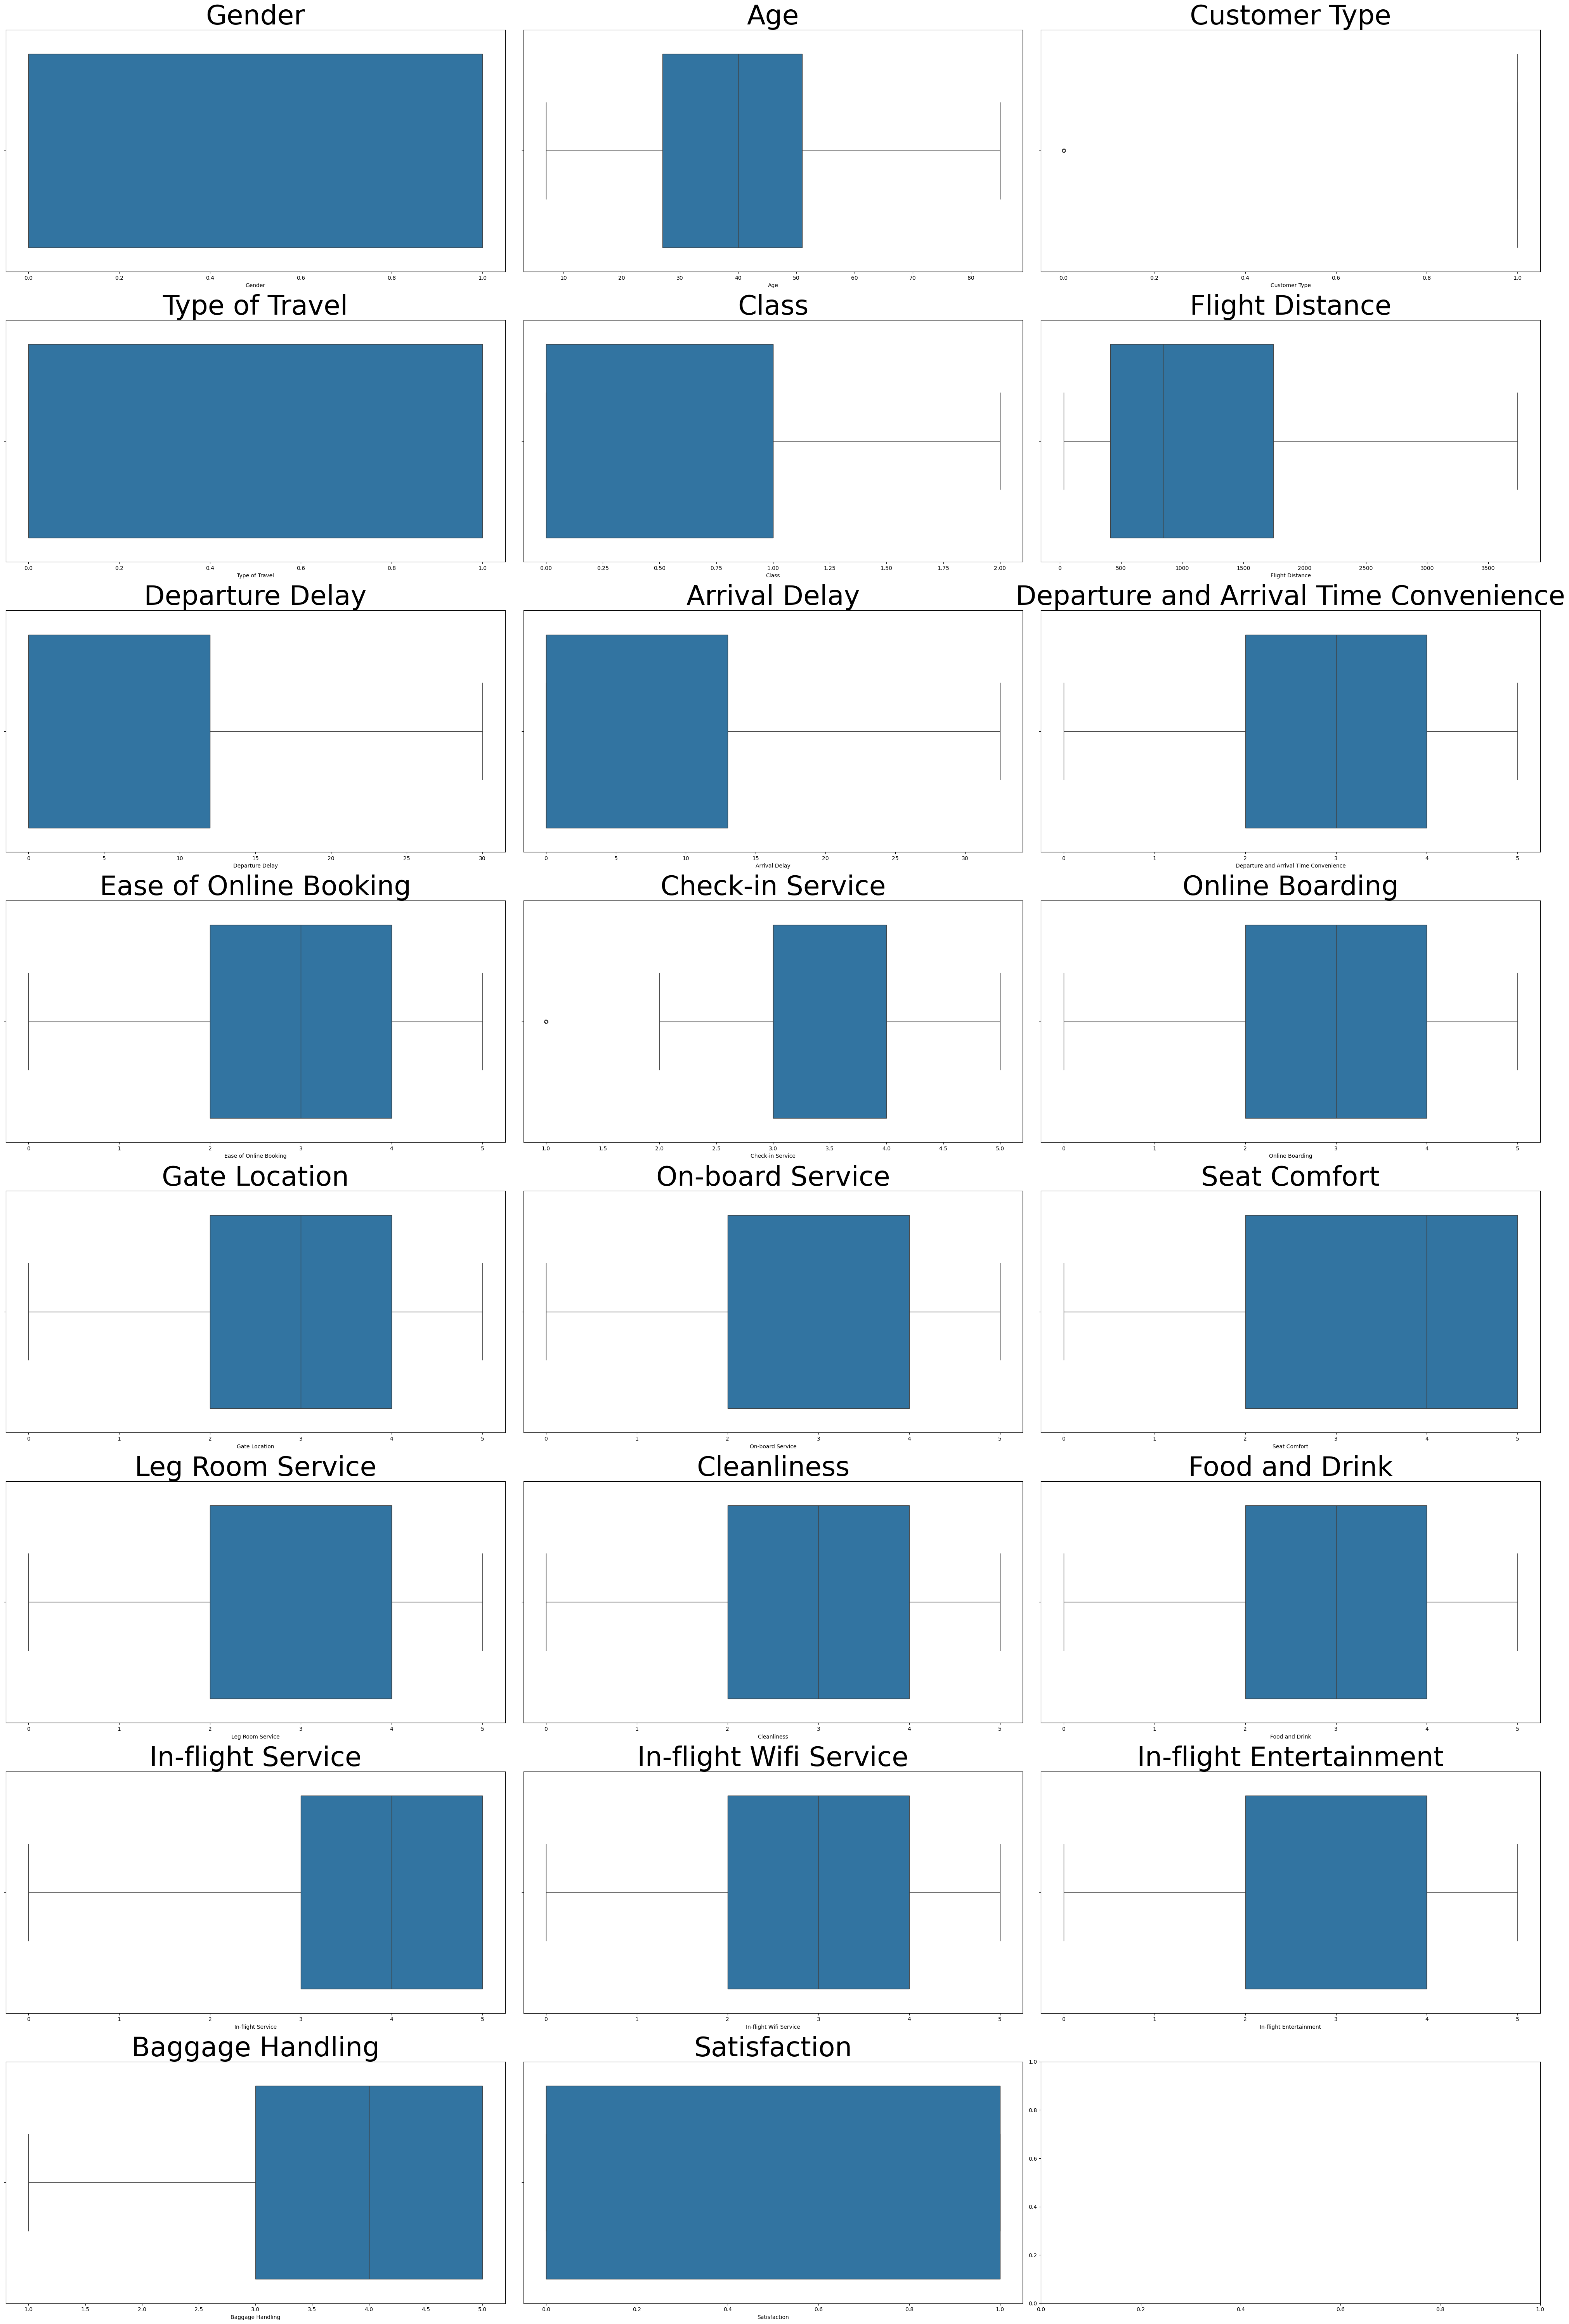

In [317]:
# Creating subplots to recheck: 
fig, axes = plt.subplots(8, 3, figsize=(40, 60))


axes = axes.flatten()

# Loop over each column to plot
for i, col in enumerate(df.select_dtypes(exclude=['object']).columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col,fontsize= 50)

plt.tight_layout()
plt.show()

# corelation

In [318]:
df.corr().round(2)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
Gender,1.00,0.01,0.03,0.01,-0.01,0.00,0.00,0.00,0.01,0.01,...,0.01,-0.03,0.03,0.00,0.00,0.04,0.01,0.00,0.04,0.01
Age,0.01,1.00,0.28,-0.04,-0.12,0.10,-0.01,-0.01,0.04,0.02,...,0.06,0.16,0.04,0.05,0.02,-0.05,0.02,0.07,-0.05,0.13
Customer Type,0.03,0.28,1.00,0.31,-0.04,0.23,-0.00,-0.01,0.21,0.02,...,0.05,0.16,0.05,0.08,0.06,-0.02,0.01,0.11,-0.02,0.19
Type of Travel,0.01,-0.04,0.31,1.00,0.49,-0.27,-0.01,-0.01,0.26,-0.13,...,-0.06,-0.13,-0.14,-0.08,-0.07,-0.02,-0.11,-0.15,-0.03,-0.45
Class,-0.01,-0.12,-0.04,0.49,1.00,-0.43,0.01,0.02,0.09,-0.10,...,-0.21,-0.21,-0.20,-0.13,-0.08,-0.16,-0.02,-0.18,-0.17,-0.45
Flight Distance,0.00,0.10,0.23,-0.27,-0.43,1.00,0.00,-0.01,-0.02,0.07,...,0.11,0.16,0.13,0.10,0.06,0.06,0.01,0.13,0.07,0.30
Departure Delay,0.00,-0.01,-0.00,-0.01,0.01,0.00,1.00,0.84,-0.00,-0.01,...,-0.03,-0.03,-0.01,-0.02,-0.02,-0.04,-0.03,-0.03,-0.02,-0.07
Arrival Delay,0.00,-0.01,-0.01,-0.01,0.02,-0.01,0.84,1.00,-0.00,-0.01,...,-0.05,-0.04,-0.02,-0.03,-0.03,-0.05,-0.03,-0.04,-0.03,-0.10
Departure and Arrival Time Convenience,0.01,0.04,0.21,0.26,0.09,-0.02,-0.00,-0.00,1.00,0.44,...,0.07,0.01,0.01,0.01,0.00,0.07,0.34,-0.01,0.07,-0.05
Ease of Online Booking,0.01,0.02,0.02,-0.13,-0.10,0.07,-0.01,-0.01,0.44,1.00,...,0.04,0.03,0.11,0.02,0.03,0.04,0.71,0.05,0.04,0.17


### heatmap analysis

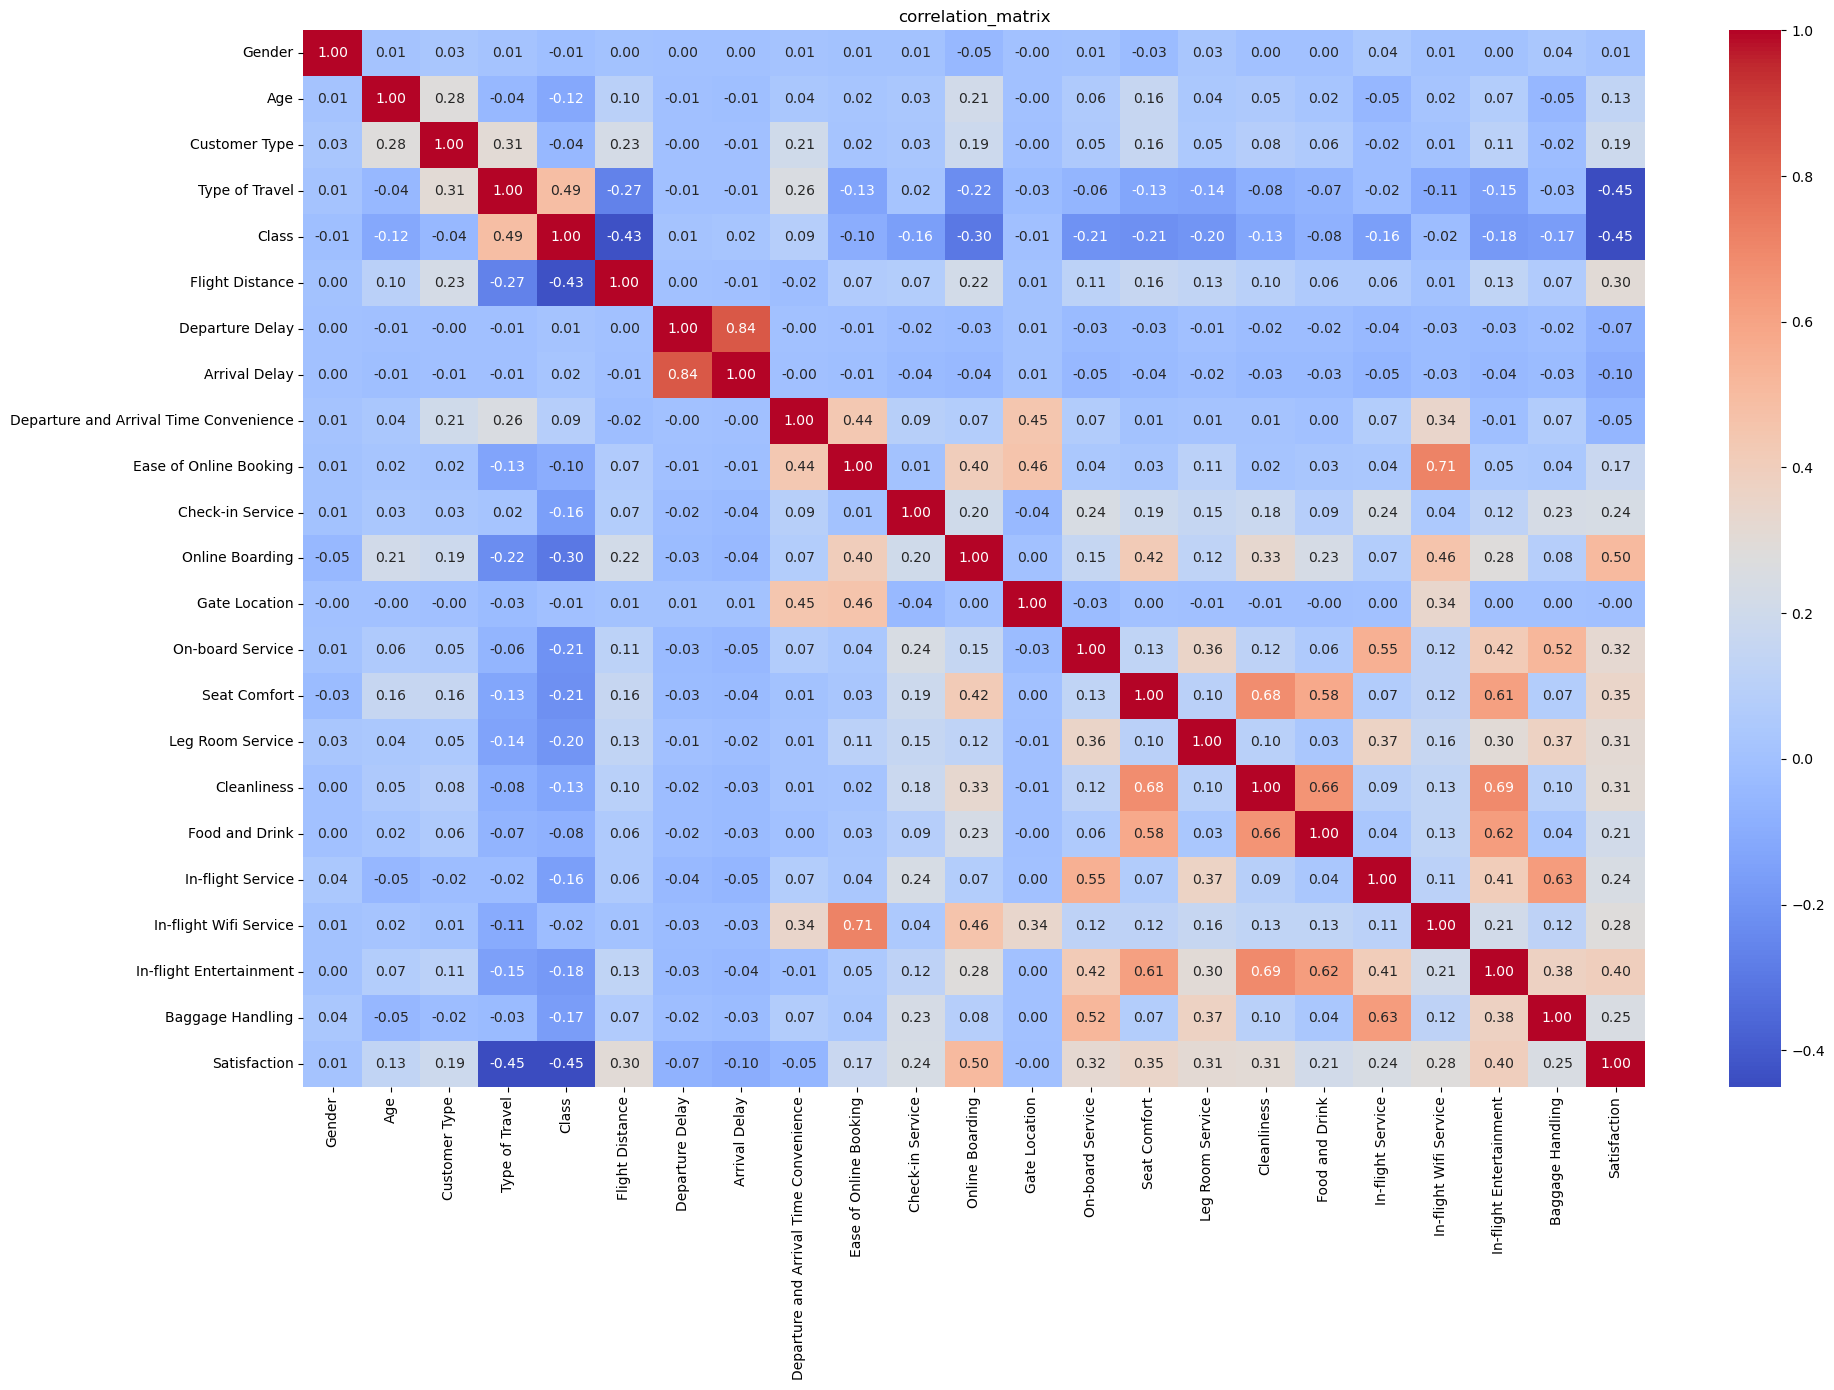

In [319]:
plt.figure(figsize =(20,14))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot = True,fmt =".2f",cmap="coolwarm")
plt.title("correlation_matrix")
plt.tight_layout()
plt.show()

In [320]:
#if we want we can delete any one correlation that is of ['Departure Delay' or 'Arrival Delay']

In [327]:
df = df.drop('Departure Delay', axis=1)

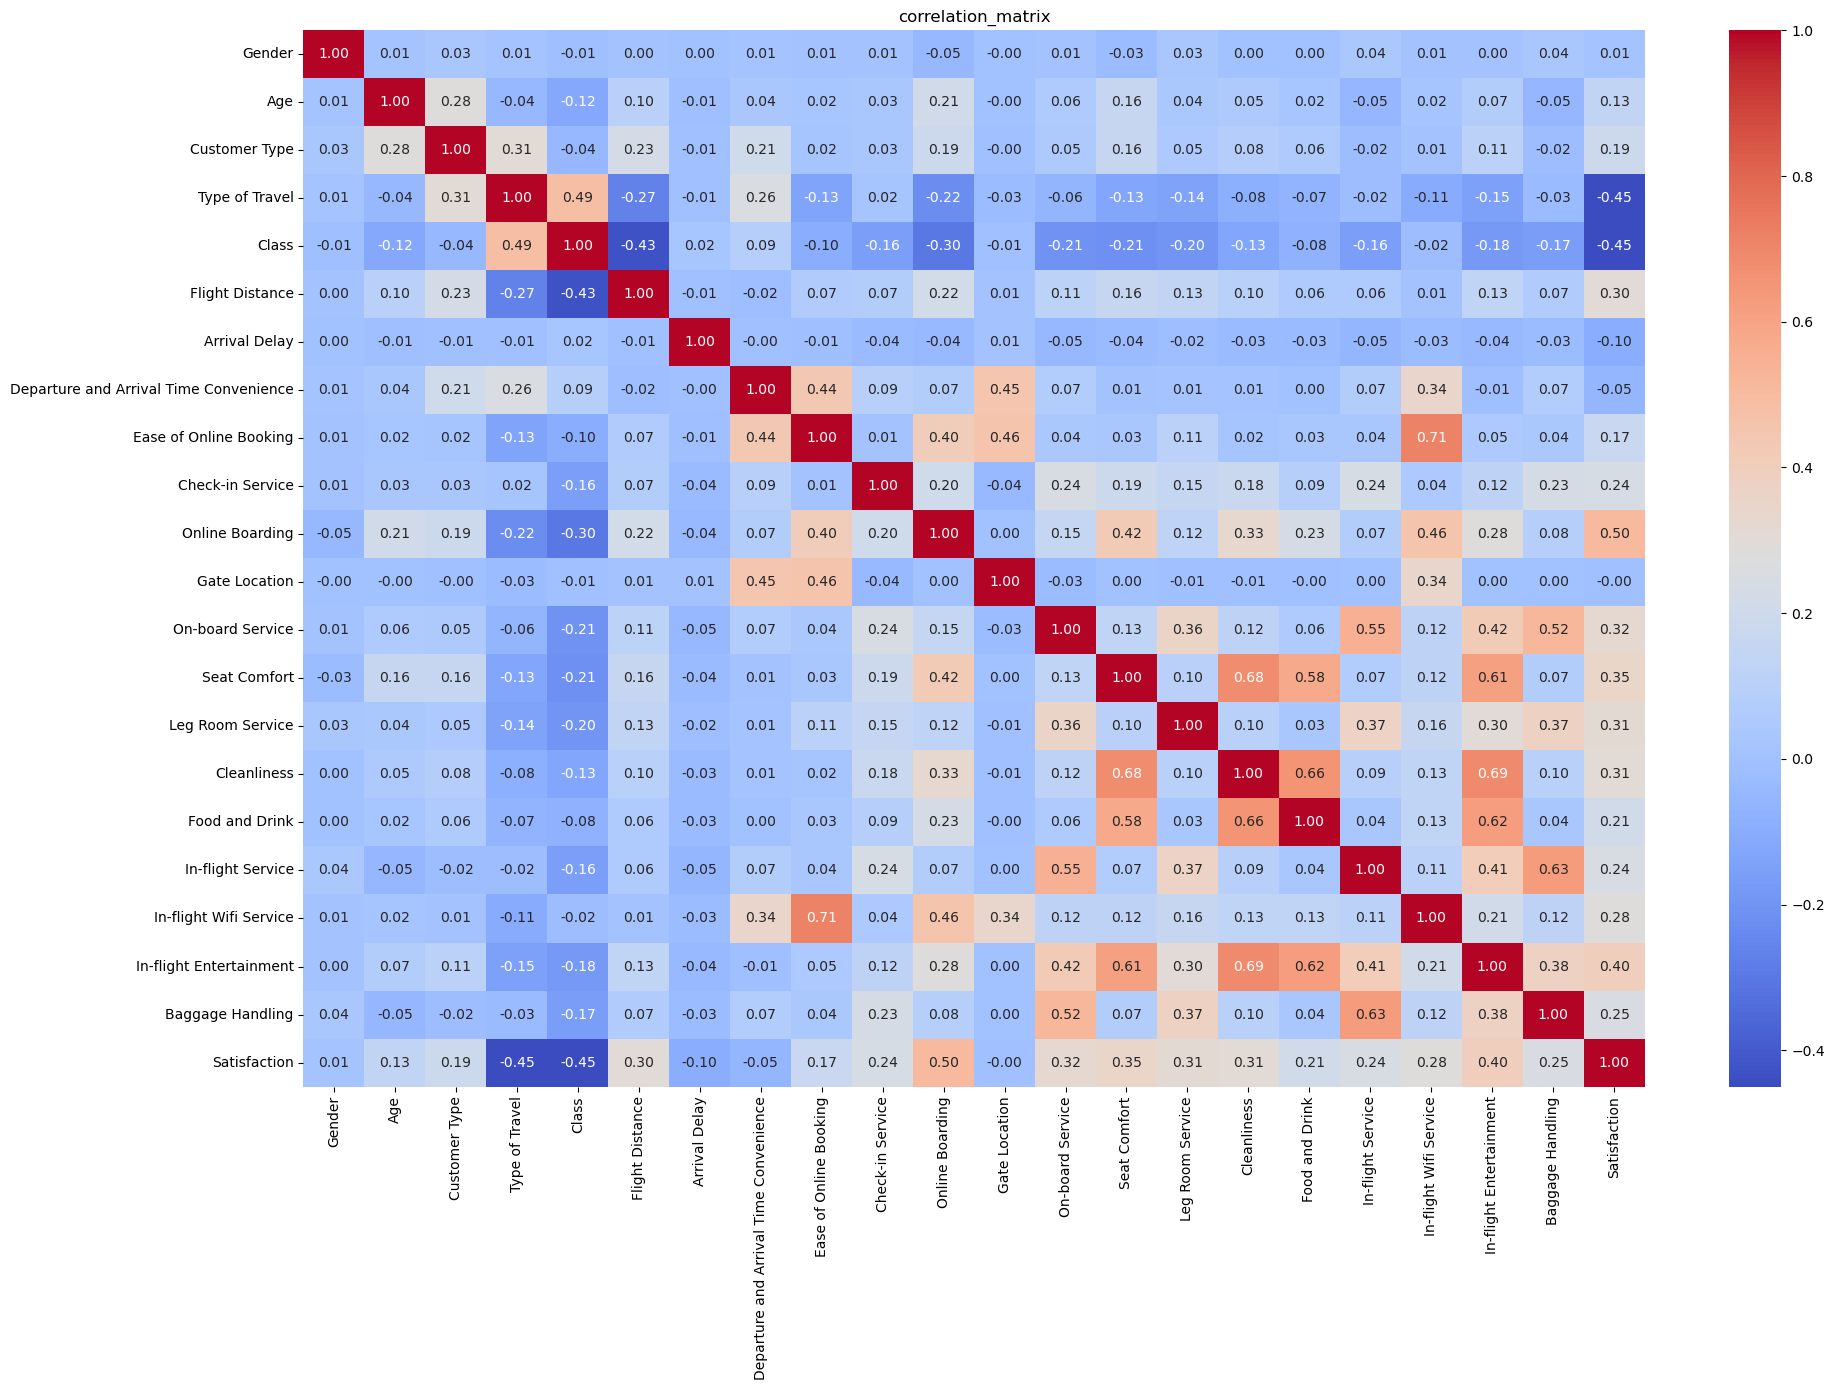

In [328]:
# after removing the columns
plt.figure(figsize =(20,14))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot = True,fmt =".2f",cmap="coolwarm")
plt.title("correlation_matrix")
plt.tight_layout()
plt.show()

In [329]:
# checking for imbalace treatment ( not necessary)
df.Satisfaction.value_counts()

Satisfaction
0    73452
1    56428
Name: count, dtype: int64

Text(0.5, 1.0, 'Target')

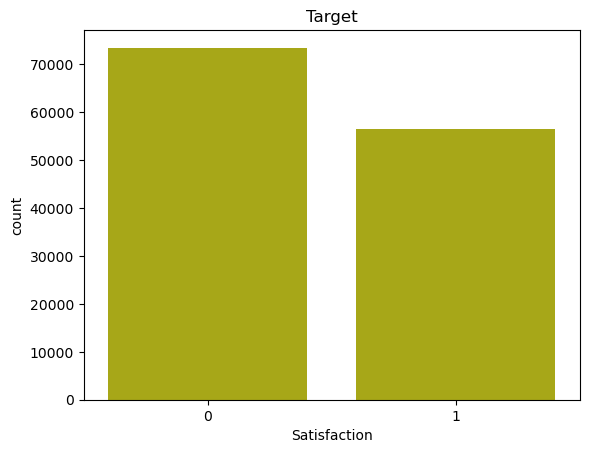

In [330]:
sns.barplot(df.Satisfaction.value_counts(),color='y')
plt.title('Target')

## spliting the data into Training and Testing Data

In [331]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [332]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)

# model building

#### 1-decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51416
           1       1.00      1.00      1.00     39500

    accuracy                           1.00     90916
   macro avg       1.00      1.00      1.00     90916
weighted avg       1.00      1.00      1.00     90916


              precision    recall  f1-score   support

           0       0.95      0.96      0.96     22036
           1       0.94      0.94      0.94     16928

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964

********************
Training Acc : 1.0

Test Acc : 0.9494148444718201


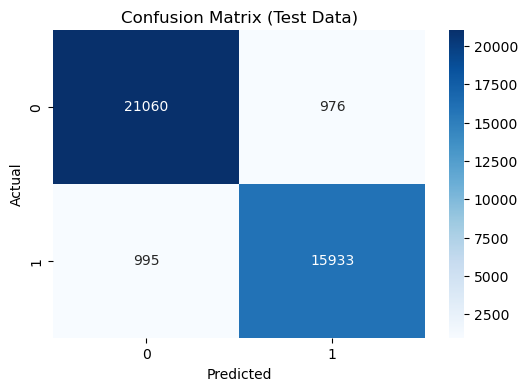

In [333]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy')
dt = dtree.fit(x_train, y_train)
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt_test)  

print(classification_report(y_train, y_pred_dt_train))
print()
print(classification_report(y_test, y_pred_dt_test))
print("********************")
print("Training Acc :", accuracy_score(y_train, y_pred_dt_train))
print()
print("Test Acc :",accuracy_score(y_test, y_pred_dt_test))


cm = confusion_matrix(y_test, y_pred_dt_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()




### 2-Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51416
           1       1.00      1.00      1.00     39500

    accuracy                           1.00     90916
   macro avg       1.00      1.00      1.00     90916
weighted avg       1.00      1.00      1.00     90916


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22036
           1       0.97      0.94      0.96     16928

    accuracy                           0.96     38964
   macro avg       0.97      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964

********************
Training Acc : 1.0

Test Acc : 0.963658761934093


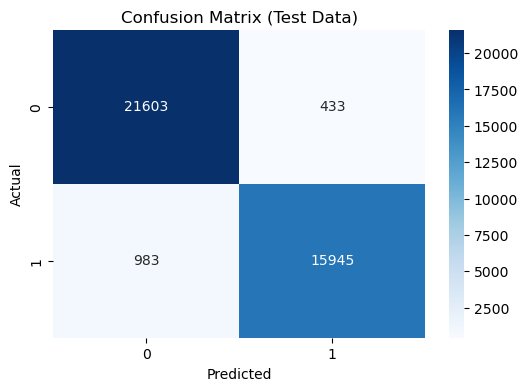

In [334]:
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier()
rf = rfc.fit(x_train,y_train)
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf_test)  

print(classification_report(y_train, y_pred_rf_train))
print()
print(classification_report(y_test, y_pred_rf_test))
print("********************")
print("Training Acc :", accuracy_score(y_train, y_pred_rf_train))
print()
print("Test Acc :",accuracy_score(y_test, y_pred_rf_test))


cm = confusion_matrix(y_test, y_pred_rf_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()



### 3-XGBoost

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     51416
           1       0.98      0.96      0.97     39500

    accuracy                           0.98     90916
   macro avg       0.98      0.98      0.98     90916
weighted avg       0.98      0.98      0.98     90916


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22036
           1       0.97      0.95      0.96     16928

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964

********************
Training Acc : 0.9767587663337587

Test Acc : 0.9637100913663895
**************************


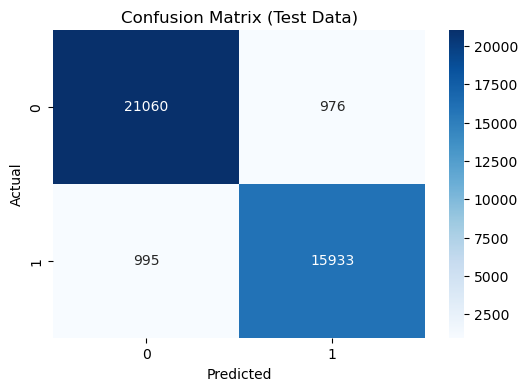

In [335]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb = xgb.fit(x_train, y_train)

y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb) 

print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))
print("********************")
print("Training Acc :", accuracy_score(y_train, y_pred_train_xgb))
print()
print("Test Acc :",accuracy_score(y_test, y_pred_test_xgb))
print('**************************')


cm = confusion_matrix(y_test, y_pred_dt_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()


### 4-KNN Model

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     51416
           1       0.86      0.79      0.82     39500

    accuracy                           0.85     90916
   macro avg       0.85      0.84      0.85     90916
weighted avg       0.85      0.85      0.85     90916


              precision    recall  f1-score   support

           0       0.79      0.83      0.81     22036
           1       0.76      0.71      0.73     16928

    accuracy                           0.78     38964
   macro avg       0.77      0.77      0.77     38964
weighted avg       0.78      0.78      0.78     38964

********************
Train_Accuracy : 0.8504223679000396

Test_Accuracy : 0.777127604968689
**************************


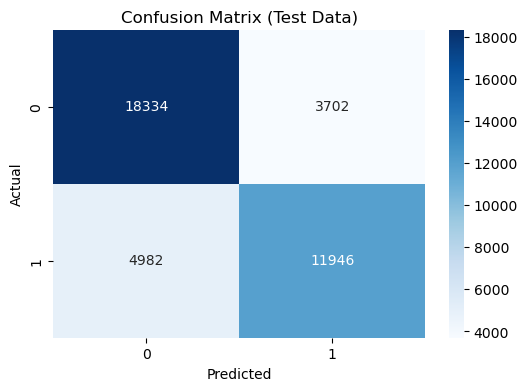

In [336]:
# importing the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the model
knn=knn.fit(x_train, y_train)

# predictions
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

# Evaluations

accuracy_knn = accuracy_score(y_test, y_pred_test_knn)

print(classification_report(y_train, y_pred_train_knn))
print()
print(classification_report(y_test, y_pred_test_knn))
print("********************")
print("Train_Accuracy :", accuracy_score(y_train, y_pred_train_knn))
print()
print("Test_Accuracy :" , accuracy_score(y_test, y_pred_test_knn))
print('**************************')


cm = confusion_matrix(y_test, y_pred_test_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()


### 5-Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.84      0.85     51416
           1       0.80      0.81      0.80     39500

    accuracy                           0.83     90916
   macro avg       0.82      0.82      0.82     90916
weighted avg       0.83      0.83      0.83     90916


              precision    recall  f1-score   support

           0       0.85      0.84      0.85     22036
           1       0.80      0.81      0.80     16928

    accuracy                           0.83     38964
   macro avg       0.82      0.82      0.82     38964
weighted avg       0.83      0.83      0.83     38964

********************
Training Acc : 0.8264551894056051

Test Acc : 0.8268144954316805


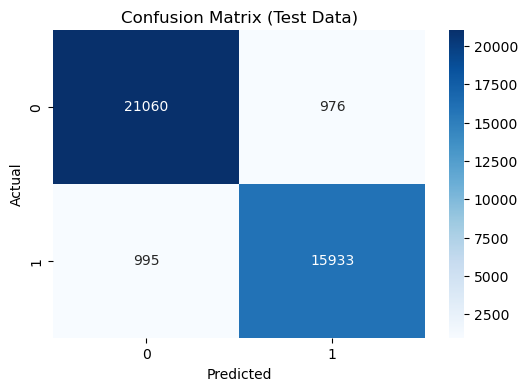

In [337]:

logit = LogisticRegression(random_state = 7)
lr = logit.fit(x_train, y_train)
y_pred_train_lr = lr.predict(x_train)
y_pred_test_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_test_lr)  

print(classification_report(y_train, y_pred_train_lr))
print()
print(classification_report(y_test, y_pred_test_lr))
print("********************")
print("Training Acc :", accuracy_score(y_train, y_pred_train_lr))
print()
print("Test Acc :",accuracy_score(y_test, y_pred_test_lr))


cm = confusion_matrix(y_test, y_pred_dt_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Evaluation matrix

In [338]:

list1 = ['Random forest', 'XG BOOST', 'Logistic Regression', 'Decision Tree', "KNeighbors"]
list2 = [accuracy_rf, accuracy_xgb, accuracy_lr, accuracy_dt, accuracy_knn]

# Create DataFrame
df_accuracy = pd.DataFrame({'Model Name': list1, 'Accuracy': list2})

print(df_accuracy)

            Model Name  Accuracy
0        Random forest  0.963659
1             XG BOOST  0.963710
2  Logistic Regression  0.826814
3        Decision Tree  0.949415
4           KNeighbors  0.777128


Axes(0.125,0.11;0.775x0.77)


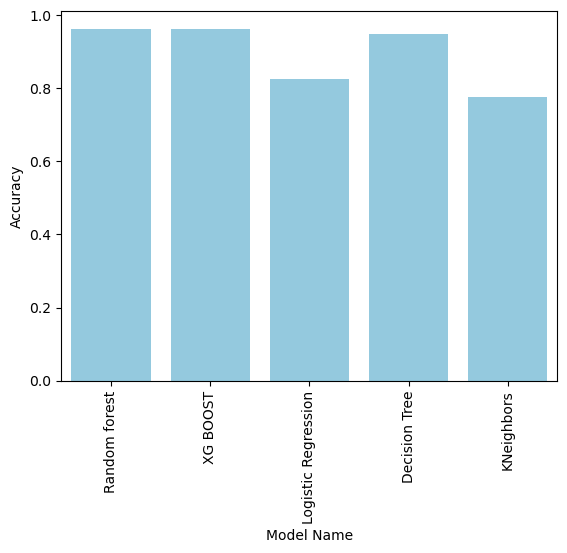

In [339]:
charts = sns.barplot(x='Model Name', y='Accuracy', data=df_accuracy,color = 'skyblue')
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

# cross validation approach

In [340]:
print(f"x_train: {x_train.shape}")
print("y_train :",y_train.shape)

x_train: (90916, 21)
y_train : (90916,)


In [341]:
from sklearn.model_selection import cross_val_score  

accuracy_rf = cross_val_score(rf, x_train, y_train, cv=10)  
accuracy_xgb = cross_val_score(xgb, x_train, y_train, cv=10)  
accuracy_lr = cross_val_score(lr, x_train, y_train, cv=10)  
accuracy_dt = cross_val_score(dt, x_train, y_train, cv=10)  
accuracy_knn = cross_val_score(knn, x_train, y_train, cv=10)  

# Print mean accuracy  
print(f"Mean Random Forest Cross-Validation: {accuracy_rf.mean()}")  
print(f"Mean XGBoost Cross-Validation: {accuracy_xgb.mean()}")  
print(f"Mean Logistic Regression Cross-Validation: {accuracy_lr.mean()}")  
print(f"Mean Decision Tree Cross-Validation: {accuracy_dt.mean()}")  
print(f"Mean Gradient Descent Cross-Validation: {accuracy_knn.mean()}")   


Mean Random Forest Cross-Validation: 0.9629988187579629
Mean XGBoost Cross-Validation: 0.9627897785034468
Mean Logistic Regression Cross-Validation: 0.8200977294010606
Mean Decision Tree Cross-Validation: 0.9475558733194014
Mean Gradient Descent Cross-Validation: 0.7731750962296801
